(1, 231, 226)
(773,)
HTI_Artibonite_1149_05_2016.tif
(1, 231, 226)
(772,)
HTI_Artibonite_1149_06_2016.tif
(1, 231, 226)
(771,)
HTI_Artibonite_1149_07_2016.tif
(2316,)
1.092448
2.0691383


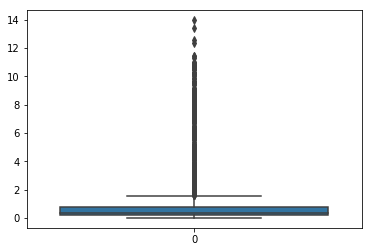

In [147]:
from pathlib import Path
import numpy as np
import pandas as pd
import rasterio
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale

BASEDIR = Path('.').resolve().parent
#adm_units = sorted(['_'.join(x.name.split('_')[:3]) for x in BASEDIR.joinpath('datain/HTI/2012/04/subnational/l1').iterdir() if x.name.endswith('.tif')])
adm_units = ['HTI_Artibonite_1149']
#months = sorted([x.name for x in BASEDIR.joinpath('datain/HTI/2013').iterdir() if not 'Annual' in x.name])
months = ['05','06','07']
years = sorted([x.name for x in BASEDIR.joinpath('datain/HTI').iterdir()])

for unit in adm_units:
    temporal_units = []
    data_array = np.array
    for month in months:
        #for year in years:
        for year in ['2016']:
            raster = BASEDIR.joinpath(f'datain/HTI/{year}/{month}/subnational/l1/{unit}_{month}_{year}.tif')
            if raster.exists():
                with rasterio.open(raster) as src:
                    data = src.read()
                    print(data.shape)
                    #data[data == -99999] = np.nan
                    data = data[np.where((data!= -99999)& (data!=0))]
                    #data = data[data >=0]
                    #data = data.reshape(data.shape[1]*data.shape[0])
                    #data = data[data<data.std()]
                    
                    temporal_units.append(data)
                    print(data.shape)
                print(raster.name)
    #stack = np.stack(temporal_units)
    #stack = np.array(temporal_units)
    stack = np.concatenate(tuple(temporal_units), axis=0)
    print(stack.shape)
#stack = (stack - stack.min())/(stack.max() - stack.min())
sns.boxplot(data=stack)
print(stack.mean())
print(stack.std())
#sns.distplot(stack)    

(2000000,)


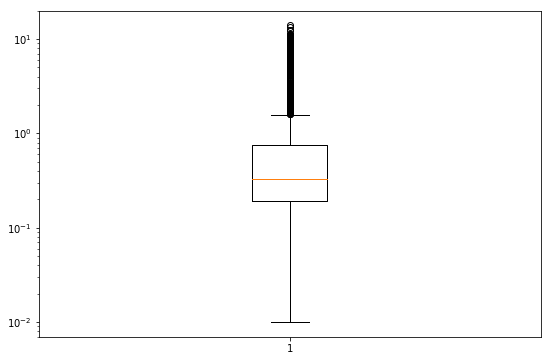

In [148]:
## Create data
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 2000000)
collectn_2 = np.random.normal(80, 30, 2000000)
collectn_3 = np.random.normal(90, 20, 2000000)
collectn_4 = np.random.normal(70, 25, 2000000)
print(collectn_1.shape)
## combine these different collections into a list    
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]
#data_to_plot = [data]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
plt.yscale('log')
# Create the boxplot
#bp = ax.boxplot(data_to_plot)
bp = ax.boxplot(stack)

# Save the figure
fig.savefig('fig4_log.png', bbox_inches='tight')